# Методы классификации
## Мандрикова Анастасия
### Решающие деревья

In [1]:
data <- read.csv("dataNegrusha3.csv")
head(data)

,X,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter,Skinfold,Matake,LogHDL,LogLDL
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,0,3750,52,76.3,77,19,29.40000,0.78390154,1.1908876
2,2,1,3500,54,84.0,92,37,33.69786,0.98207847,1.2669476
3,3,1,3840,54,90.0,91,24,37.84200,0.71783979,1.0508216
4,4,1,4120,54,82.5,80,34,43.93071,0.02955880,0.8501509
5,5,1,3750,53,86.0,80,30,26.11143,0.11332868,0.9042182
6,6,1,3550,53,76.0,88,53,39.27857,0.05826891,0.7654678


In [2]:
data <- data[c("Group", "ChildWeight", "ChildHeight", "MotherWeightBefore", "MotherWeightAfter")]
head(data)

,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter
,<int>,<int>,<int>,<dbl>,<int>
1,0,3750,52,76.3,77
2,1,3500,54,84.0,92
3,1,3840,54,90.0,91
4,1,4120,54,82.5,80
5,1,3750,53,86.0,80
6,1,3550,53,76.0,88


Warning message:
"package 'tree' was built under R version 4.0.5"


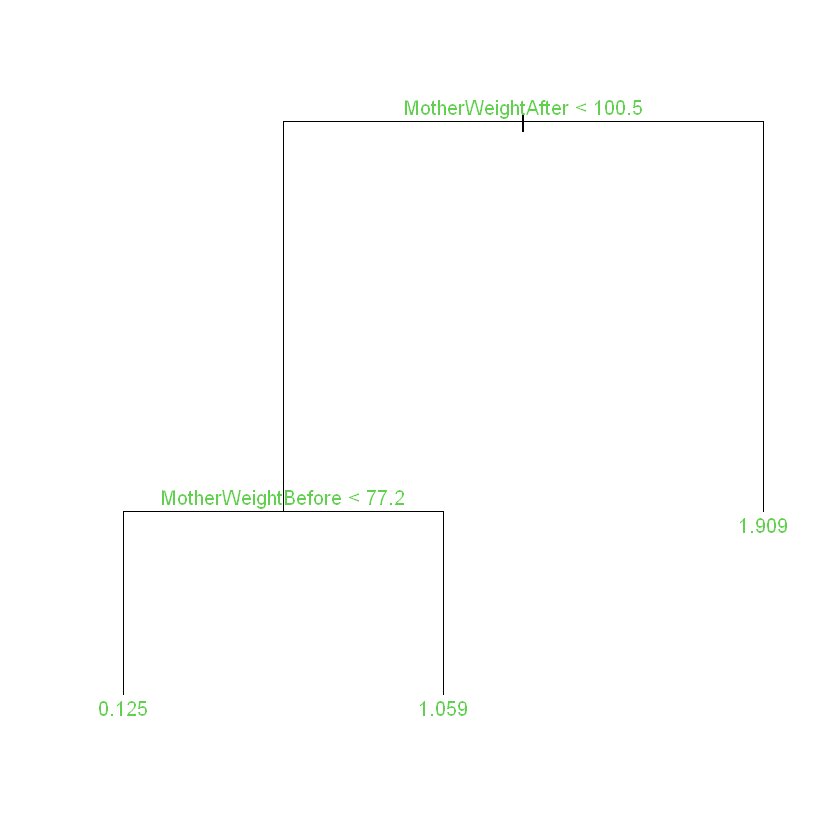

In [3]:
library("tree")
treeA <- tree(Group~., data)
plot(treeA);text(treeA, col = 3)

In [4]:
summary(treeA)


Regression tree:
tree(formula = Group ~ ., data = data)
Variables actually used in tree construction:
[1] "MotherWeightAfter"  "MotherWeightBefore"
Number of terminal nodes:  3 
Residual mean deviance:  0.08258 = 2.725 / 33 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.90910 -0.05882 -0.05882  0.00000  0.09091  0.94120 

In [5]:
I_inf <- function(X){
    nn <- table(X)
    n <- sum(nn)
    n*log(n) - sum(nn*log(nn))
}

D_inf <- function(X, Y){I_inf(c(X, Y)) - I_inf(X) - I_inf(Y)}

In [6]:
GinyDA <- function(y, class, k1, k2){
    # y независимая переменная, class,
    # k1,k2 минимальные объемы подвыборок
    ss <- sort(unique(y))
    ss. <- (ss[-1] + ss[-length(ss)])/2;
    # определяем середины интервалов между наблюдениями
    l <- lapply(ss., function(x){
        L1 <- class[y <= x]
        L2 <- class[y > x]
        if(length(L1) > k1 & length(L2) > k2){res <- c(D_inf(L1, L2), x)}
        else {res <- c(NA, NA)}
    })
    # считаем информационные выигрыши при размежевании данных
    d <- data.frame(na.omit(do.call('rbind', l)))
    names(d) <- c("delta", "x")
    d
}

In [7]:
GinyDA(data$ChildWeight, data$Group, 2, 2)

delta,x
<dbl>,<dbl>
2.21599363,3050
3.02324387,3120
1.62018023,3150
0.46368064,3180
0.87675994,3225
1.39035684,3260
1.24792599,3275
0.40964627,3305
0.25267154,3340


In [8]:
GinyDA(data$ChildHeight, data$Group, 2, 2)

delta,x
<dbl>,<dbl>
2.21599363,49.5
0.46368064,50.5
0.06731721,51.5
0.65407634,52.5
0.87675994,53.5
0.24221930,54.5


In [9]:
GinyDA(data$MotherWeightBefore, data$Group, 2, 2)

delta,x
<dbl>,<dbl>
5.545739,65.60
7.777599,72.50
10.318002,73.75
13.349389,75.25
11.000853,76.15
15.207358,77.20
13.965087,79.40
13.160219,81.35
12.623227,82.25


In [10]:
GinyDA(data$MotherWeightAfter, data$Group, 2, 2)

delta,x
<dbl>,<dbl>
5.545739,64.0
3.915534,68.5
5.863467,72.5
5.160869,76.5
7.266867,78.5
8.864795,80.5
8.651964,81.5
8.646686,83.5
12.028473,86.5


Максимальное значение $\Delta = 15.21$, если $MotherWeightBefore < 77.2$, то группа $0$.

In [11]:
A <- data[data$MotherWeightBefore >= 77.2,]
B <- data[data$MotherWeightBefore < 77.2,]
A

,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter
,<int>,<int>,<int>,<dbl>,<int>
2,1,3500,54,84.0,92
3,1,3840,54,90.0,91
4,1,4120,54,82.5,80
5,1,3750,53,86.0,80
7,1,3500,54,91.0,82
8,1,3600,52,98.2,98
9,1,3000,49,94.0,94
10,1,3850,53,80.7,76
11,1,3800,53,98.8,98


In [12]:
B

,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter
,<int>,<int>,<int>,<dbl>,<int>
1,0,3750,52,76.3,77
6,1,3550,53,76.0,88
20,0,3390,51,73.0,69
32,0,4200,55,72.0,80
33,0,3270,52,50.8,50
34,0,3160,50,74.5,85
35,0,3400,52,59.2,60
36,0,3420,53,59.0,55


Повторим процедуру для группы $A$.

In [13]:
GinyDA(A$ChildWeight, A$Group, 2, 2)

delta,x
<dbl>,<dbl>
1.6120064289,3050
2.2081491546,3120
0.5120649280,3170
0.8986809355,3225
1.3571649457,3265
0.4987940039,3305
0.2863000359,3340
0.0325470466,3380
0.0249204327,3415


In [14]:
GinyDA(A$ChildHeight, A$Group, 2, 2)

delta,x
<dbl>,<dbl>
1.61200643,49.5
0.51206493,50.5
0.09966365,51.5
0.07494611,52.5
0.89868094,53.5


In [15]:
GinyDA(A$MotherWeightBefore, A$Group, 2, 2)

delta,x
<dbl>,<dbl>
1.612006,82.25
2.208149,83.25
2.839612,84.20
3.511013,85.20
5.828291,88.00
6.731779,90.25
7.723029,90.75
10.061524,92.50
8.063647,94.75


In [16]:
GinyDA(A$MotherWeightAfter, A$Group, 2, 2)

delta,x
<dbl>,<dbl>
2.208149,80.5
2.839612,81.5
4.227979,85.0
4.997475,89.0
5.828291,90.5
6.731779,91.5
7.723029,92.5
8.822869,93.5
10.061524,96.0


Максимальное значение $\Delta = 11.61$, если $MotherWeightAfter < 100.5$, то группа $1$, иначе $2$.   
Итого классифицирующее правило: Если $MotherWeightBefore < 77.2$, то группа $0$, иначе если $MotherWeightAfter < 100.5$, то группа $1$, иначе $2$.

In [17]:
C <- A[A$MotherWeightAfter >= 100.5,]
A <- A[A$MotherWeightAfter < 100.5,]
A

,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter
,<int>,<int>,<int>,<dbl>,<int>
2,1,3500,54,84.0,92
3,1,3840,54,90.0,91
4,1,4120,54,82.5,80
5,1,3750,53,86.0,80
7,1,3500,54,91.0,82
8,1,3600,52,98.2,98
9,1,3000,49,94.0,94
10,1,3850,53,80.7,76
11,1,3800,53,98.8,98


In [18]:
B

,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter
,<int>,<int>,<int>,<dbl>,<int>
1,0,3750,52,76.3,77
6,1,3550,53,76.0,88
20,0,3390,51,73.0,69
32,0,4200,55,72.0,80
33,0,3270,52,50.8,50
34,0,3160,50,74.5,85
35,0,3400,52,59.2,60
36,0,3420,53,59.0,55


In [19]:
C

,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter
,<int>,<int>,<int>,<dbl>,<int>
14,1,3600,52,86.0,107
21,2,3500,51,111.8,120
22,2,4930,58,102.0,105
24,2,3330,53,102.0,102
25,2,3500,53,108.8,105
26,2,3140,50,121.0,123
27,2,3350,51,97.3,105
28,2,3590,53,122.0,110
29,2,3410,52,104.0,114


Сравним с классификацией полученной встроенной функцией.

In [20]:
C <- data[data$MotherWeightAfter >= 100.5,]
B <- data[data$MotherWeightAfter < 100.5,]
A <- B[B$MotherWeightBefore >= 77.2,]
B <- B[B$MotherWeightBefore < 77.2,]
A

,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter
,<int>,<int>,<int>,<dbl>,<int>
2,1,3500,54,84.0,92
3,1,3840,54,90.0,91
4,1,4120,54,82.5,80
5,1,3750,53,86.0,80
7,1,3500,54,91.0,82
8,1,3600,52,98.2,98
9,1,3000,49,94.0,94
10,1,3850,53,80.7,76
11,1,3800,53,98.8,98


In [21]:
B

,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter
,<int>,<int>,<int>,<dbl>,<int>
1,0,3750,52,76.3,77
6,1,3550,53,76.0,88
20,0,3390,51,73.0,69
32,0,4200,55,72.0,80
33,0,3270,52,50.8,50
34,0,3160,50,74.5,85
35,0,3400,52,59.2,60
36,0,3420,53,59.0,55


In [22]:
C

,Group,ChildWeight,ChildHeight,MotherWeightBefore,MotherWeightAfter
,<int>,<int>,<int>,<dbl>,<int>
14,1,3600,52,86.0,107
21,2,3500,51,111.8,120
22,2,4930,58,102.0,105
24,2,3330,53,102.0,102
25,2,3500,53,108.8,105
26,2,3140,50,121.0,123
27,2,3350,51,97.3,105
28,2,3590,53,122.0,110
29,2,3410,52,104.0,114


Качество классификации совпадает. 

### Случайный лес

In [23]:
library("randomForest")
data.rf <- randomForest(as.factor(Group)~., data = data)
table(data$Group, predict(data.rf))

Warning message:
"package 'randomForest' was built under R version 4.0.5"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



   
     0  1  2
  0  5  2  0
  1  2 15  1
  2  0  2  9

In [24]:
print(data.rf)


Call:
 randomForest(formula = as.factor(Group) ~ ., data = data) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.44%
Confusion matrix:
  0  1 2 class.error
0 5  2 0   0.2857143
1 2 15 1   0.1666667
2 0  2 9   0.1818182


Информативность признаков:

In [25]:
importance(data.rf) 

,MeanDecreaseGini
ChildWeight,2.366535
ChildHeight,0.816124
MotherWeightBefore,9.791274
MotherWeightAfter,8.615379


Классифицирующее правило по тем же признакам, но доля ошибок по методу случайного леса больше.